In [1]:
# Import myfunc at cix folder
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../cix')
import myfuncs as mf
import pandas as pd
from rdkit import Chem
from rdkit import rdBase
rdBase.DisableLog('rdApp.*') # To make rdkit silent
from rdkit.Chem import PandasTools as pt
from rdkit.Chem import Descriptors
import numpy as np
import time

/home/gcolmenarejo/anaconda3/envs/cix/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


This is an script to analyze the output of experiment 6. The CMD was run to create doubly-conditioned molecules (mw = 250 and logp = 1). This needed a modification of SSAV to deal with multiple conditioning sampling (uses mySSAV.py file).

In [2]:
##########################################################
## Analysis of the conditioned output
##########################################################

# Init the time counter for the whole notebook
start = time.time()

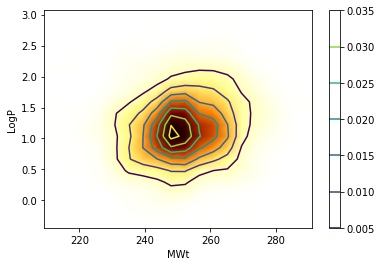

In [3]:
# 2D plot of MW vs logP of output set
smis = mf.smif2smis('./con2-50000.csv')
ncorr, n, smis, wrongsmis = mf.corrsmis(smis)
smis = list(set(smis))
nun = len(smis)
smidf = mf.smis2smidf(smis)
smidf['mol'] = smidf['smiles'].apply(Chem.MolFromSmiles)
smidf['mwt'] = smidf['mol'].apply(Descriptors.MolWt)
smidf['logp'] = smidf['mol'].apply(Descriptors.MolLogP)
smidf_prop = smidf[["mwt","logp"]]
mf.bidiplot(np.asarray(smidf_prop), "MWt","LogP", d = True)

In [4]:
print(n, ncorr, nun)

(5000, 4904, 1211)


In [5]:
smidf_s = smidf[["smiles","id"]]
cls = mf.clusmidf(smidf)
cl_smis_co = []
for i in range(10):
    cl = cls[i]
    smis = [smidf.loc[smidf["id"] == i, "smiles"].iloc[0] for i in cl]
    cl_smis_co.append(smis)

Clustering time: 00:00:05


,smiles,id,mol,mwt,logp
0,O=S(=O)(c1ccc(F)cc1)N1CCOCC1,s1,"<img src="""" alt=""Mol""/>",245.275,0.84660
1,OC(CN1CCOCC1)c1cncc(Cl)c1,s2,"<img src="""" alt=""Mol""/>",242.706,1.10060
2,CN1CC(=O)N(CCCOc2ccccc2)C1=O,s3,"<img src="""" alt=""Mol""/>",248.282,1.34950
3,Cc1nc2ccccc2cc1C(=O)N1CCOCC1,s4,"<img src="""" alt=""Mol""/>",256.305,2.01562
4,CCOc1ccc(CN2CCC(C(N)=O)C2)cc1,s5,"<img src="""" alt=""Mol""/>",248.326,1.39250

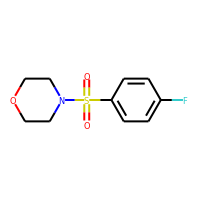
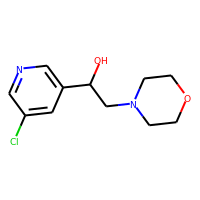
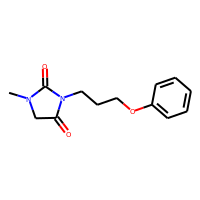
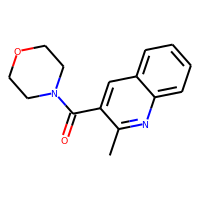
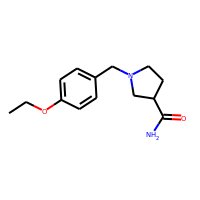

In [6]:
smidf.head()

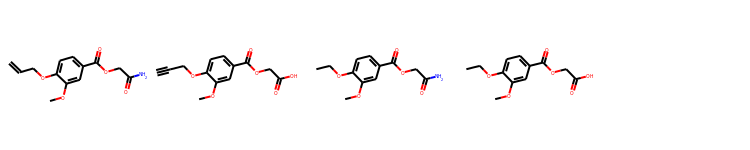

In [14]:
mf.paintmols(cl_smis_co[6])

In [8]:
# End the time counter for the whole notebook
end = time.time()
eltime = end - start
print('Exp6Analysis execution time: ' + time.strftime("%H:%M:%S", time.gmtime(eltime)))

Exp6Analysis execution time: 00:00:07
